In [1]:
from orcs.core import HDFCube
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.mlab import bivariate_normal
import matplotlib.colors as colors
%matplotlib notebook
import matplotlib.animation as manimation; manimation.writers.list()
from matplotlib.colors import LogNorm
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib as mpl

#Definition
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - 
                value)).argmin()
    return array[idx]

/usr/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load a cube 
cube=HDFCube('M33-SW_SN3.merged.cm1.1.0.hdf5')

19-05-26|23:11:05 # HDFCube.__init__ > Data shape : (2048, 2064, 402)


In [3]:
# Take a look at the deep frame
deep_frame = cube.get_deep_frame()
fig = pl.figure()
ax = fig.add_subplot(111)#, projection=cube.get_wcs())
#ax.coords[0].set_major_formatter('hh:mm:ss.s')
#ax.coords[1].set_major_formatter('dd:mm:ss')
pl.imshow(deep_frame.T, origin='bottom-left',
          vmin=np.nanpercentile(deep_frame, 0.05),
          vmax=np.nanpercentile(deep_frame, 95),
          cmap='gray_r')
pl.xlim((0,2048))
pl.ylim((0,2064))
pl.grid()

AttributeError: 'HDFCube' object has no attribute 'get_deep_frame'

In [4]:
#Extract a spectrum of an HII region and the sky to find Halpha
%matplotlib nbagg
xrhii = 932
yrhii = 1025
xsky = 1613
ysky = 1839
aperture = 3 # Aperture for the spectrum integration (circle)

axis, spectrum = cube.extract_spectrum(xrhii, yrhii, aperture, silent=True)
axis2, sky = cube.extract_spectrum(xsky, ysky, aperture, silent=True)

spectrum = spectrum-sky
print np.where(spectrum == max(spectrum))

backend nbAgg version unknown


AttributeError: 'HDFCube' object has no attribute 'extract_spectrum'

backend nbAgg version unknown


<IPython.core.display.Javascript object>


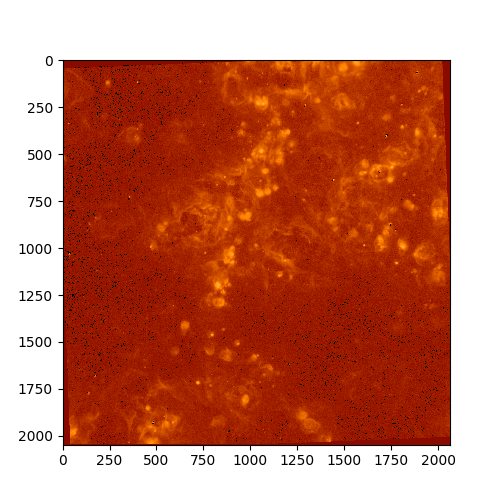

<IPython.core.display.Javascript object>


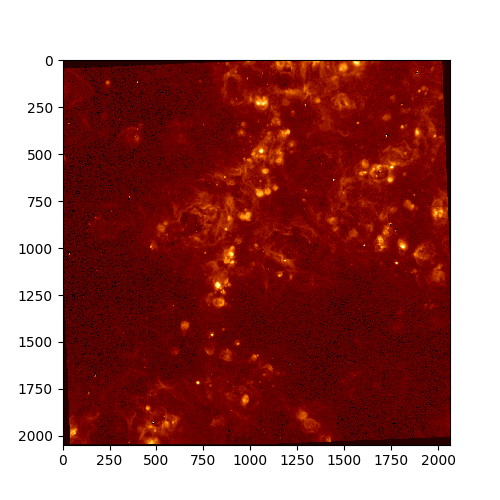

In [29]:
# Plot an image of Halpha
%matplotlib inline
fig = plt.figure(figsize=(5,5))   
image_data = cube.get_data_frame(np.where(spectrum == max(spectrum))[0][0], silent=True)
image_data[np.where(np.isfinite(image_data) == False)] = 1e-20
image_data = np.arcsinh(image_data*1e17)
#image_data[np.where(image_data < 0)] = 1e-22
    
mi = -0.5
ma = 25
plt.imshow(image_data, cmap='afmhot', norm=colors.PowerNorm(gamma=1./3.))#, norm=LogNorm(vmin=mi, vmax=ma))
plt.clim(mi,ma)
plt.show()

fig = plt.figure(figsize=(5,5))
    
image_data = cube.get_data_frame(np.where(spectrum == max(spectrum))[0][0], silent=True)
image_data[np.where(np.isfinite(image_data) == False)] = 1e-20
image_data = np.arcsinh(image_data)
#image_data[np.where(image_data < 0)] = 1e-22
    
mi = -1e-19
ma = 8e-16
plt.imshow(image_data, cmap='afmhot', norm=colors.PowerNorm(gamma=1./3.5))#, norm=LogNorm(vmin=mi, vmax=ma))
plt.clim(mi,ma)
plt.show()

<IPython.core.display.Javascript object>


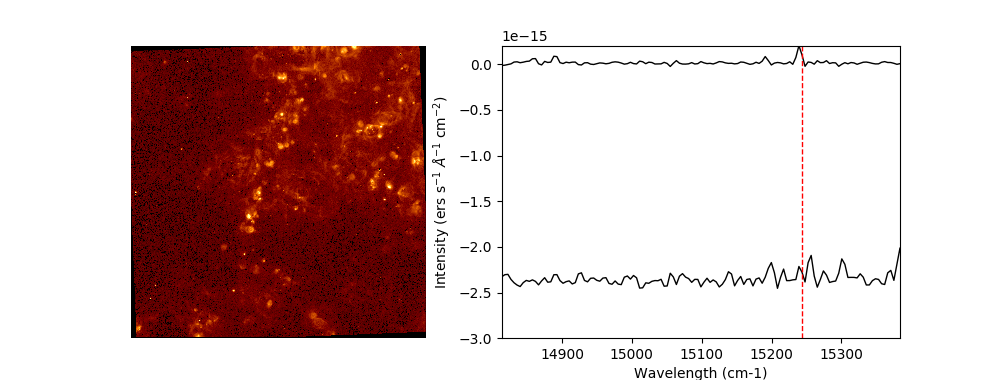

WARNING| /h/r-nepton/.local/lib/python2.7/site-packages/matplotlib/animation.py:1218: UserWarning: MovieWriter   unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)



Animation.save using <class 'matplotlib.animation.ImageMagickFileWriter'>
findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral (u'/h/r-nepton/.local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
findfont: Matching :family=STIXSizeOneSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXSizeOneSym (u'/h/r-nepton/.local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf') with score of 0.050000
findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=bold:stretch=normal:size=10.0 to STIXGeneral (u'/h/r-nepton/.local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf') with score of 0.000000
findfont: Matching :family=STIXSizeThreeSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXSizeThreeSym (u'/h/r-nepton/.local/lib/python2.7/site-packages/matplot

In [30]:
# *************Decide which contrast you prefer the most*************
# if first image:
#gamma = 1./3.
# if second image
gamma = 1./3.5

# Then produce and save the video
axis, spectrum = cube.extract_spectrum(xrhii, yrhii, aperture, silent=True)
axis2, sky = cube.extract_spectrum(xsky, ysky, aperture, silent=True)

spectrum = spectrum-sky

frames = [] # for storing the generated images
mi = -1e-19
ma = 5e-16
xmin = 1e7/650
xmax = 1e7/675

fig, (ax0, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.8), gridspec_kw = {'width_ratios':[1, 1.3]}, frameon=False)
ax2.set_xmargin(0.95)
ax2.set_ymargin(0.95)
ax2.set_xlim(find_nearest(np.array(axis),xmax),find_nearest(np.array(axis),xmin))
ax2.set_ylim(-3e-15, np.max(spectrum))
ax2.set_xlabel('Wavelength (cm-1)')
ax2.set_ylabel('Intensity (ers s$^{-1}$ $\AA$$^{-1}$ cm$^{-2}$)')
ax2.plot(axis, spectrum, c='k', linewidth=1)  

# The sky is enhanced and scale for visibility of the plot
ax2.plot(axis, 5*sky-2.5e-15, c='k', linewidth=1)  
ax0.axis('off')

for i in range(np.where(axis == find_nearest(np.array(axis),xmax))[0],np.where(axis == find_nearest(np.array(axis),xmin))[0]):
    
    img = cube.get_data_frame(i, silent=True) # some array of images
    img[np.where(np.isfinite(img) == False)] = 1e-20
    img = np.arcsinh(img)
    image1 = ax0.imshow(img, cmap='afmhot', norm=colors.PowerNorm(gamma=gamma) , clim=[mi,ma])
    image2 = ax2.axvline(x=axis[i], color='r', linestyle='--', linewidth=1)
    frames.append([image1,image2])

ani = animation.ArtistAnimation(fig, frames, interval=500,
                                repeat_delay=500)
frame=[]
ani.save(Target_movie.gif', writer = ' ', fps=5)
plt.show()

INFO| Number of integrated pixels: 253


 [==========] [100%] [completed in 0.011 s]                                   
 [==========] [100%] [completed in 0.317 s]                                   


INFO| Number of integrated pixels: 1961


 [==========] [100%] [completed in 0.019 s]                                   


INFO| Init of the parallel processing server with 16 threads


 [==========] [100%] [completed in 0.701 s]                                   


<IPython.core.display.Javascript object>


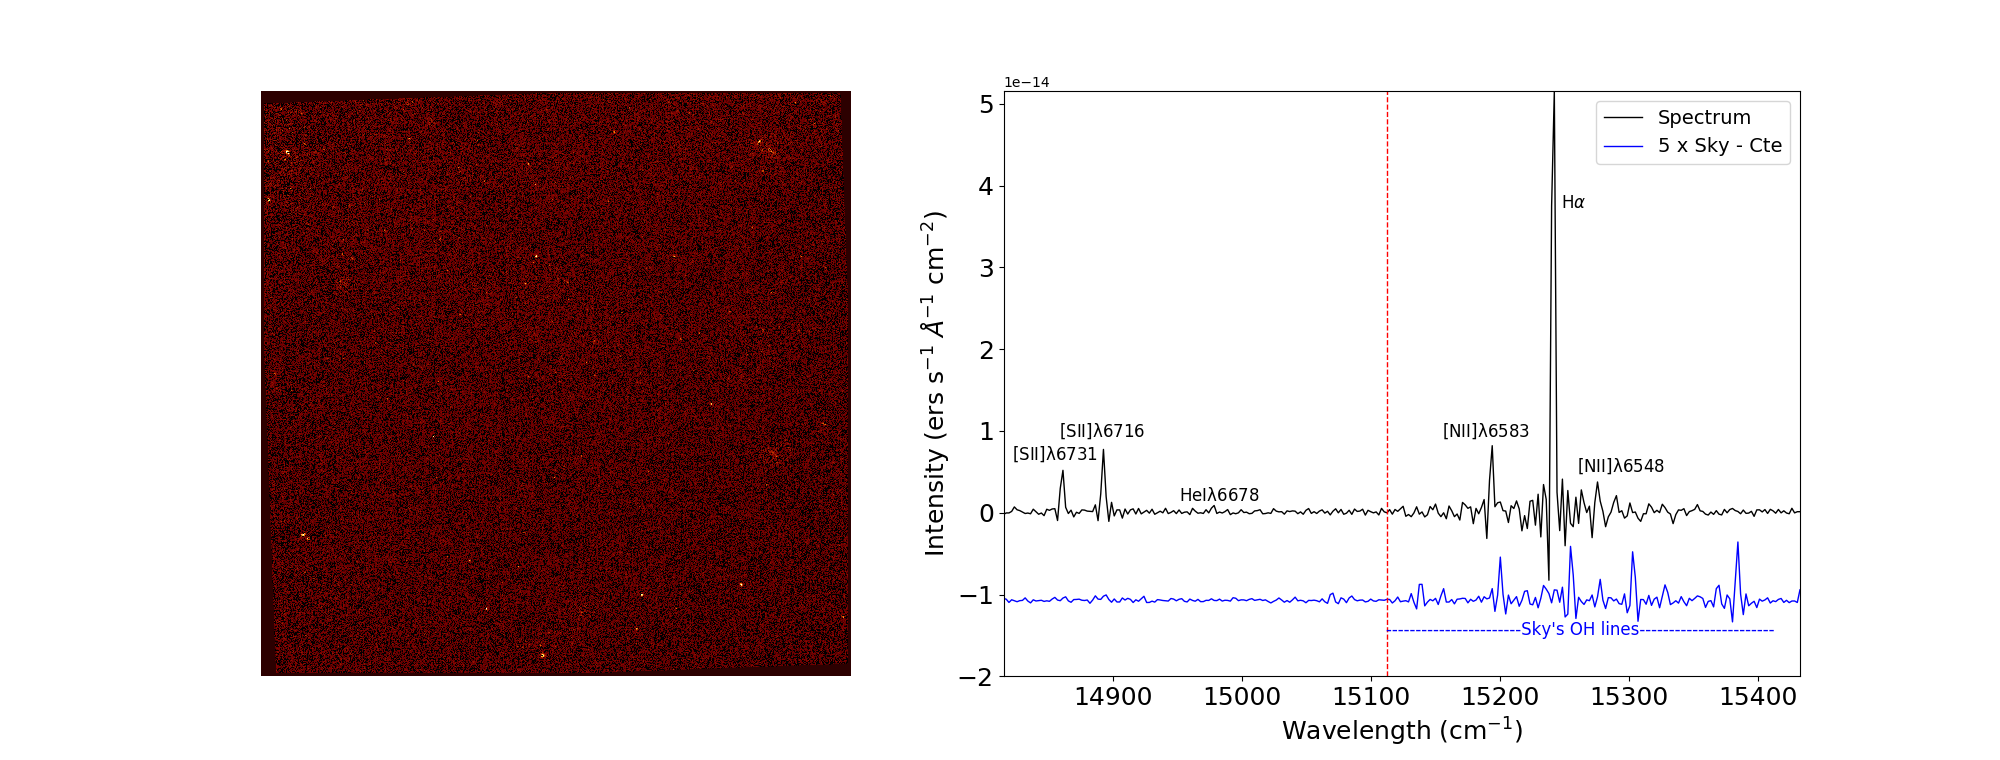

 [==========] [100%] [completed in 2.13 s]                                    
 [==========] [100%] [completed in 2.14 s]                                    
 [==========] [100%] [completed in 2.14 s]                                    
 [==========] [100%] [completed in 2.17 s]                                    
 [==========] [100%] [completed in 2.17 s]                                    
 [==========] [100%] [completed in 2.17 s]                                    
 [==========] [100%] [completed in 2.17 s]                                    
 [==========] [100%] [completed in 2.17 s]                                    
 [==========] [100%] [completed in 2.17 s]                                    
 [==========] [100%] [completed in 2.17 s]                                    
 [==========] [100%] [completed in 2.17 s]                                    
 [==========] [100%] [completed in 2.17 s]                                    
 [==========] [100%] [completed in 2.17 s]          

 [==========] [100%] [completed in 2.19 s]                                    
 [==========] [100%] [completed in 2.19 s]                                    
 [==========] [100%] [completed in 2.19 s]                                    
 [==========] [100%] [completed in 2.18 s]                                    
 [==========] [100%] [completed in 2.19 s]                                    
 [==========] [100%] [completed in 2.16 s]                                    
 [==========] [100%] [completed in 2.18 s]                                    
 [==========] [100%] [completed in 2.19 s]                                    
 [==========] [100%] [completed in 2.18 s]                                    
 [==========] [100%] [completed in 2.18 s]                                    
 [==========] [100%] [completed in 2.18 s]                                    
 [==========] [100%] [completed in 2.18 s]                                    
 [==========] [100%] [completed in 2.18 s]          

In [46]:
#fig = plt.figure(figsize=[8,6])

# For another region
axis, spectrum = cube.extract_spectrum(632, 1025, 9, silent=True)
axis2, sky = cube.extract_spectrum(613, 1839, 25, silent=True)

spectrum = spectrum-sky/7.716 #(7.716 = 25*25/(9*9) The difference in apperture for the sky and the region)

frames = [] # for storing the generated images
mi = -1e-19
ma = 5e-16
xmin = 1e7/648
xmax = 1e7/675

fig, (ax0, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,7.6), gridspec_kw = {'width_ratios':[1, 1.3]}, frameon=False)
ax2.set_xmargin(0.95)
ax2.set_ymargin(0.95)
ax2.set_xlim(find_nearest(np.array(axis),xmax),find_nearest(np.array(axis),xmin))
ax2.set_ylim(-20e-15, np.max(spectrum))
ax2.tick_params(labelsize=18)
ax2.set_xlabel('Wavelength (cm$^{-1}$)', fontsize=18)
ax2.set_ylabel('Intensity (ers s$^{-1}$ $\AA$$^{-1}$ cm$^{-2}$)', fontsize=18)
ax2.plot(axis, spectrum, c='k', linewidth=1, label='Spectrum')  
ax2.plot(axis, 5*sky/7.716-12e-15, c='blue', linewidth=1, label='5 x Sky - Cte')  
ax2.legend(fontsize=14)
ax0.axis('off')



ax2.annotate('$\mathrm{H}$'+r'$\alpha$',xy=(0.7,0.8),xycoords='axes fraction',\
            fontsize=12.0, color='k')
ax2.annotate('$\mathrm{[NII]\lambda6548}$',xy=(0.72,0.35),xycoords='axes fraction',\
            fontsize=12.0, color='k')
ax2.annotate('$\mathrm{[NII]\lambda6583}$',xy=(0.55,0.41),xycoords='axes fraction',\
            fontsize=12.0, color='k')
ax2.annotate('$\mathrm{HeI\lambda6678}$',xy=(0.22,0.3),xycoords='axes fraction',\
            fontsize=12.0, color='k')
ax2.annotate('$\mathrm{[SII]\lambda6716}$',xy=(0.07,0.41),xycoords='axes fraction',\
            fontsize=12.0, color='k')
ax2.annotate('$\mathrm{[SII]\lambda6731}$',xy=(0.01,0.37),xycoords='axes fraction',\
            fontsize=12.0, color='k')
ax2.annotate('-----------------------Sky\'s OH lines-----------------------',xy=(0.48,0.07),xycoords='axes fraction',\
            fontsize=12.0, color='b')


for i in range(np.where(axis == find_nearest(np.array(axis),xmax))[0],np.where(axis == find_nearest(np.array(axis),xmin))[0]):

    img = cube.get_data_frame(i, silent=True) # some array of images
    img[np.where(np.isfinite(img) == False)] = 1e-20
    img = np.arcsinh(img)
    image1 = ax0.imshow(img, cmap='afmhot', norm=colors.PowerNorm(gamma=1./3.5) , clim=[mi,ma])
    image2 = ax2.axvline(x=axis[i], color='r', linestyle='--', linewidth=1)
    frames.append([image1,image2])

ani = animation.ArtistAnimation(fig, frames, interval=500,
                                repeat_delay=500)

frame = []
FFwriter = animation.FFMpegWriter(fps=5, extra_args=['-vcodec', 'libx264'], bitrate=-1)
ani.save('movie_2.mp4', writer = FFwriter)
plt.show()
